# Assignment 2 WBT 
# Name: Moses Mbabaali 
# Matricola: 4846019

In [1]:
# Task 1 
# Generate sample data
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


centers = [[1, 1], [-1, -1], [1, -1]]
X, y = make_blobs(n_samples=1500, centers=centers, cluster_std=0.4,random_state=0)

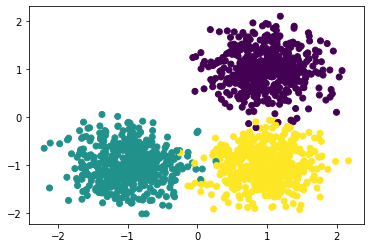

In [2]:
plt.scatter(X[:,0],X[:,1], c=y)

In [3]:
# Task 2 
import numpy as np
rawdata=np.loadtxt('semeion.data');
x=rawdata[:,0:256].copy()
t=rawdata[:,-10:rawdata.shape[1]].copy()
del(rawdata)
t=np.sign(t-.5)

In [4]:
X.shape[1]

2

In [5]:
def Kmeans_c(clusters, iterations, X):
    """ 
        The function takes in 3 inputs
        clusters: Number of clusters to be clustered on. 
        iterations: The number of iterations to choose the best model
        X: The data to be clustered
        
    """
    km = []
    models = []
    for i in range(iterations+1):
        centroids = np.random.rand(clusters,X.shape[1])
        from sklearn.cluster import KMeans
        kmeans = KMeans(n_clusters=clusters, random_state=0, init = centroids, n_init=1).fit(X)
        km.append(kmeans.inertia_)
        models.append(kmeans)
    
    min_in = min(km)
    low_iner_mod = models[km.index(min_in)]
    
    print("Inertia for the models")
    print(km)
    print()
    
    print("Min Inertia")
    print(min_in)
    
    print()
    print("Low Inertia model")
    print(low_iner_mod)
    
    return low_iner_mod 
        
best_model = Kmeans_c(6, 10, X)

Inertia for the models
[311.3049307756148, 346.00710075591525, 312.14184565955566, 312.14184565955566, 311.06456603548116, 310.2435788290231, 312.14184565955566, 311.43459516290847, 296.82783719018, 310.50356540640774, 312.14184565955566]

Min Inertia
296.82783719018

Low Inertia model
KMeans(init=array([[0.01873598, 0.64432971],
       [0.57705949, 0.21138722],
       [0.69354915, 0.71181129],
       [0.30526207, 0.2163508 ],
       [0.88753055, 0.45873404],
       [0.8961229 , 0.66821516]]),
       n_clusters=6, n_init=1, random_state=0)


In [6]:
# Distortion 
best_model.inertia_

296.82783719018

In [7]:
# Number of clusters
best_model.cluster_centers_

array([[-1.21748281, -0.69685918],
       [ 0.87005106, -1.27145768],
       [ 0.67005706,  0.91481874],
       [-0.84226949, -1.20701087],
       [ 1.09733235, -0.66848536],
       [ 1.27413041,  1.10911613]])

In [8]:
# Number of iterations 
best_model.n_iter_

28

In [9]:
# Predictions 
predict = best_model.predict(X)
predict

array([3, 4, 3, ..., 2, 3, 5], dtype=int32)

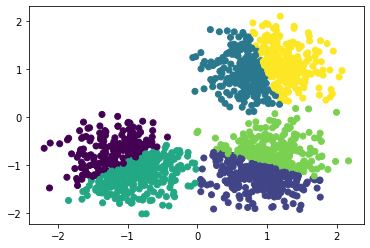

In [10]:
# Plot the predictions
plt.scatter(X[:,0],X[:,1], c=predict)

In [11]:
#cluster_membership = np.argmax(u, ax
def fcmeans(X,clusters):
    """ This function takes in 2 variables 
        X: This is the data as a numpy array 
        clusters: This is the number of clusters as ints 
        """
    
    from fcmeans import FCM
    fcm = FCM(n_clusters=clusters)
    fcm.fit(X)
    centers = fcm.centers
    pred = fcm.predict(X)
    print("Centers")
    f, axes = plt.subplots(1, 2, figsize=(11,5))
    axes[0].scatter(X[:,0], X[:,1])
    axes[1].scatter(X[:,0], X[:,1], c=pred)
    axes[1].scatter(centers[:,0], centers[:,1], marker="+", s=500, c='r' )
    plt.show()
    return centers, pred

Centers


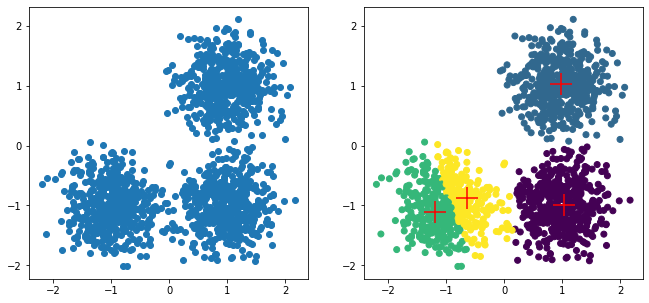

(DeviceArray([[ 1.0260841 , -0.9995217 ],
              [ 0.98204994,  1.0235808 ],
              [-1.1940713 , -1.1051148 ],
              [-0.63295126, -0.87647283]], dtype=float32),
 DeviceArray([3, 0, 3, ..., 1, 2, 1], dtype=int32))

In [12]:
fcmeans(X,4)

For i  1
Centers


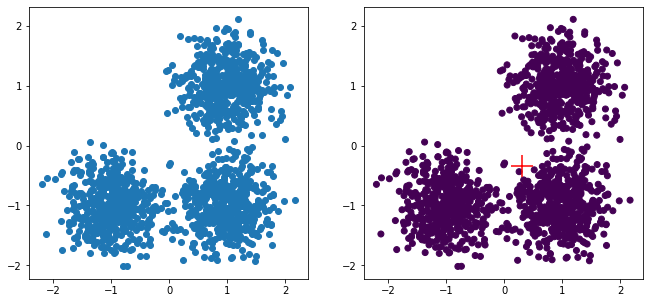

For i  2
Centers


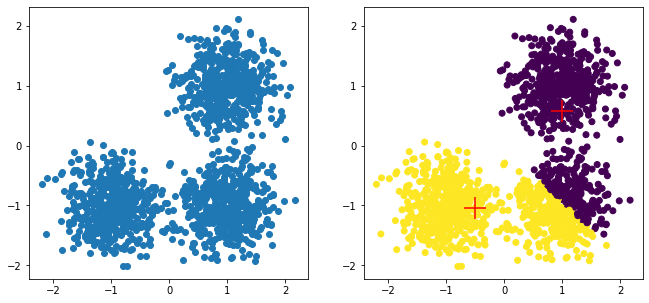

For i  3
Centers


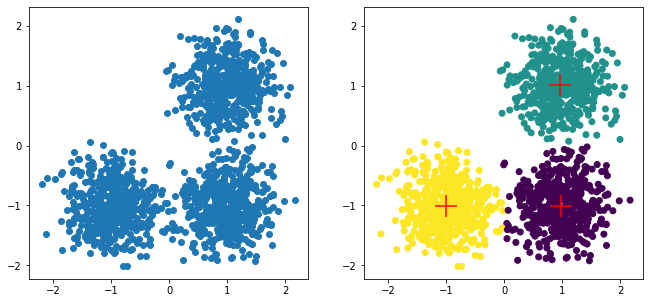

For i  4
Centers


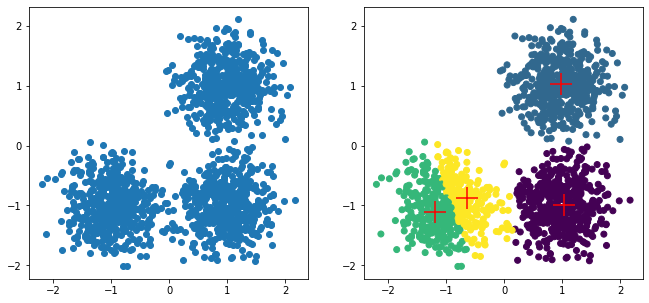

For i  5
Centers


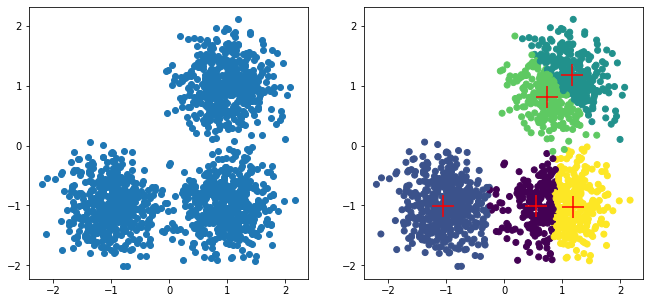

In [13]:
#Trying the algorithm out on different clusters 
for i in range(5):
    print("For i ", i+1)
    fcmeans(X,i+1)
 

In [140]:
def PossiblisticC(data, nclusters,centroids, iterations):
    """ This function takes in 4 variables 
        data : This is the data to be clustered as a numpy array.
        nclusters: The number of clusters as an int
        centroids: The initial centers as numpy array
        iterations: The max iteration as an int """
    
    from skcmeans.algorithms import Possibilistic
    clusters = Possibilistic(n_clusters=nclusters, n_init=5, max_iter=iterations)
    fitd = clusters.fit(data)
    membership = fitd.calculate_memberships(data)
    centers = fitd.calculate_centers(data)
    #print(centers)
    
    return membership, centers

In [141]:
def use_posbc(itera,clusters,data):
    """ This function takes in 2 variables 
        itera: Number of iterations as an int
        clusters: As an int 
        returns an array of labels from the iteratations 
    """
    labels = []
    centers = []
    for i in range(itera):
        initC = np.random.rand(clusters,2)*10
        membership = PossiblisticC(data,clusters,initC,5)
        plabels = np.argmax(membership[0], axis=1)
        centers.append(membership[1])
        labels.append(plabels)
    return labels , centers
    
labs = use_posbc(5,5,X)

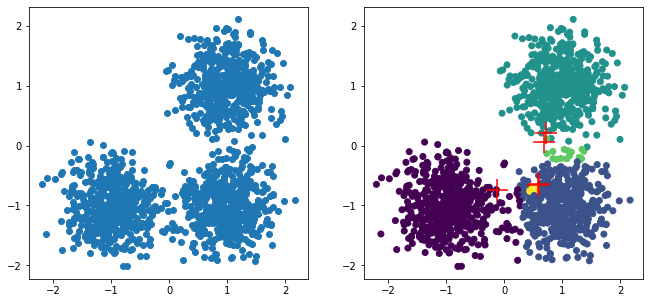

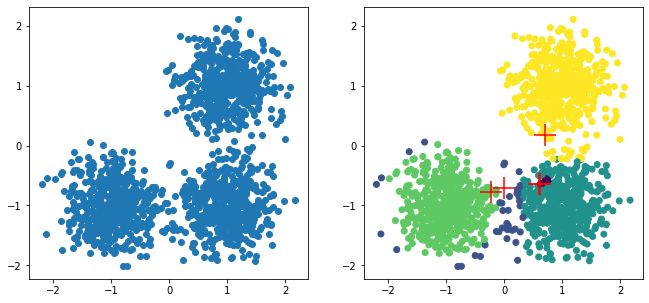

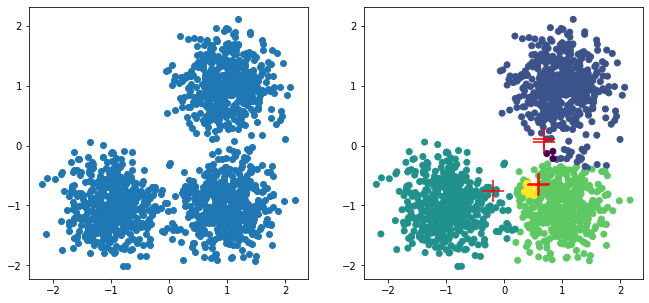

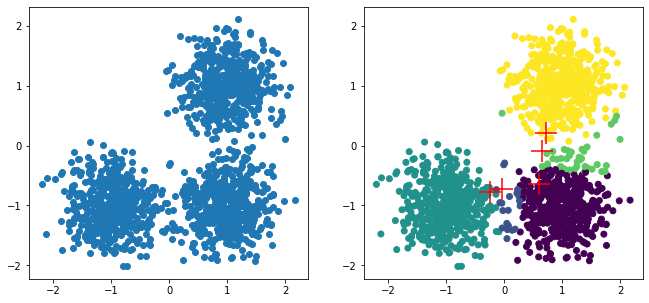

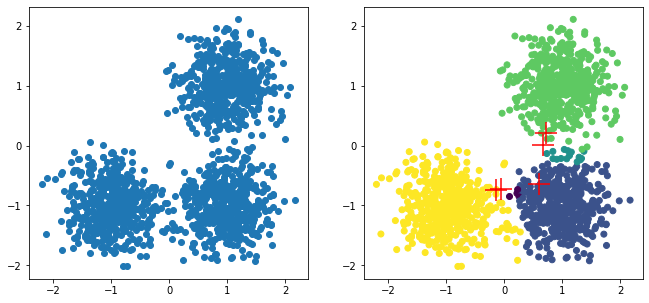

In [153]:
# Plot the output from the  5 iterations 
def plot_it(data,labels):
    """
      This takes in 2 variables. 
      data - This is a numpy array
      labels - This is a tuple of results from use_posbc()
    """
    for i, j in zip(labels[0],labels[1]):
        f, axes = plt.subplots(1, 2, figsize=(11,5))
        axes[0].scatter(data[:,0], data[:,1])
        axes[1].scatter(data[:,0], data[:,1], c=i)
        axes[1].scatter(j[:,0], j[:,1], marker="+", s=500, c='r')
        
plot_it(X,labs)

In [144]:
np.where(labs[0][0]==0)

(array([   0,    2,   10,   11,   14,   19,   33,   34,   37,   40,   43,
          44,   45,   48,   54,   55,   56,   63,   66,   72,   73,   74,
          75,   76,   78,   79,   83,   84,   87,   89,   90,   91,   94,
          98,  102,  105,  107,  108,  113,  116,  117,  118,  122,  126,
         131,  133,  134,  136,  137,  138,  143,  145,  147,  149,  151,
         154,  156,  158,  160,  161,  164,  167,  169,  173,  177,  180,
         181,  182,  183,  189,  190,  195,  201,  202,  204,  206,  211,
         219,  222,  230,  234,  238,  243,  249,  251,  253,  259,  261,
         262,  263,  267,  270,  271,  272,  274,  276,  278,  279,  284,
         285,  287,  289,  291,  293,  299,  302,  306,  307,  308,  310,
         311,  313,  316,  317,  319,  320,  327,  338,  340,  341,  346,
         349,  350,  353,  358,  362,  364,  368,  369,  371,  374,  378,
         386,  391,  393,  398,  400,  407,  411,  412,  413,  415,  416,
         417,  420,  421,  424,  428, 

In [145]:
np.where(labs[0][0]==1)

(array([   1,    6,    9,   13,   17,   18,   25,   27,   28,   29,   31,
          35,   38,   47,   52,   53,   60,   61,   62,   65,   68,   70,
          80,   81,   82,   88,   92,   93,   95,  103,  104,  110,  112,
         114,  119,  125,  127,  128,  130,  135,  139,  141,  146,  148,
         150,  159,  162,  163,  165,  170,  172,  178,  184,  188,  193,
         198,  200,  209,  210,  212,  213,  214,  215,  216,  220,  224,
         226,  229,  232,  235,  236,  239,  240,  241,  244,  248,  256,
         258,  260,  264,  265,  266,  268,  273,  275,  277,  280,  281,
         283,  286,  290,  297,  301,  305,  312,  318,  321,  323,  325,
         326,  328,  329,  331,  334,  335,  337,  344,  347,  348,  351,
         355,  356,  360,  363,  365,  366,  372,  373,  375,  376,  379,
         380,  381,  389,  390,  392,  395,  397,  399,  401,  403,  408,
         414,  418,  425,  433,  435,  436,  438,  443,  445,  447,  453,
         456,  460,  464,  466,  469, 

In [138]:
 #np.any([[True, False], [False, False]], where=[[False], [True]])
            
            #if(np.where(labs[0][i]==i) not in indices):
               # indices.append(np.where(labs[0][i]==i))

## Task 4

In [154]:
from sklearn.decomposition import PCA
reduced_data = PCA(n_components=2).fit_transform(x)
reduced_data.shape

(1593, 2)

## Possiblistic Cmeans

In [155]:
from sklearn.datasets import load_digits

data, labels = load_digits(return_X_y=True)
(n_samples, n_features), n_digits = data.shape, np.unique(labels).size

print(
    f"# digits: {n_digits}; # samples: {n_samples}; # features {n_features}"
)

# digits: 10; # samples: 1797; # features 64


In [156]:
type(data)

numpy.ndarray

In [159]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(x)
class_labels = use_posbc(5,5,reduced_data)

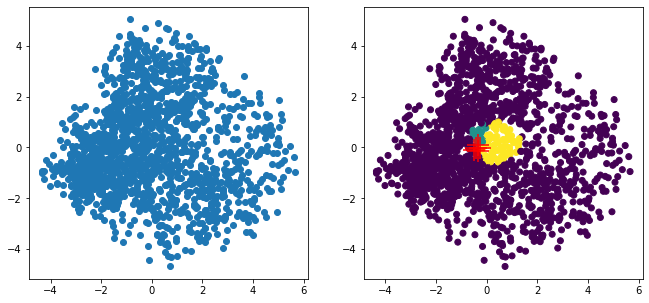

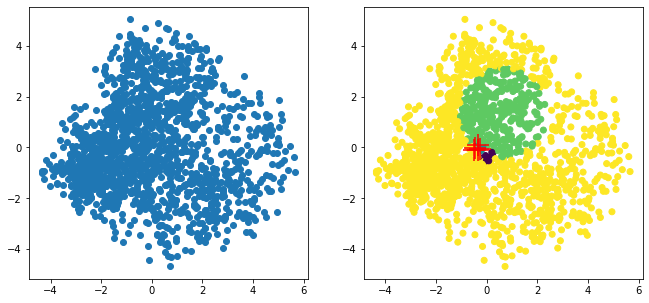

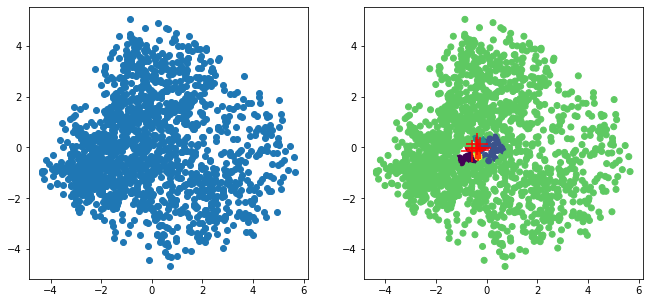

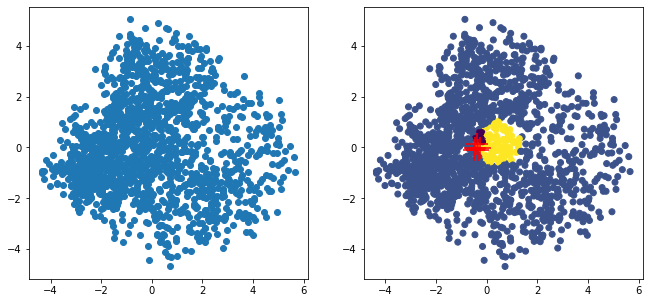

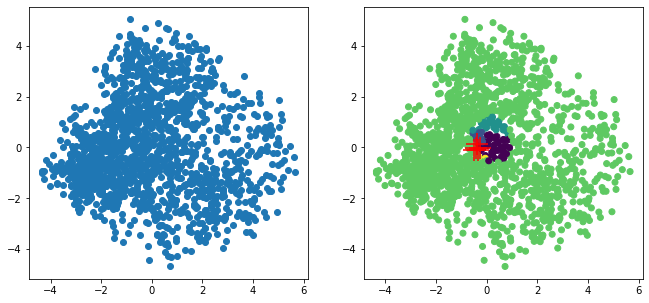

In [160]:
#class_labels for the handritting data
plot_it(reduced_data,class_labels)

In [176]:
np.unique(class_labels[0][0])

array([0, 1, 2, 3, 4])

In [166]:
np.where(class_labels[0][0]==0)[0].size

1490

In [167]:
np.where(class_labels[0][0]==1)[0].size

3

In [168]:
np.where(class_labels[0][0]==2)[0].size

20

In [169]:
np.where(class_labels[0][0]==3)[0].size

2

In [170]:
np.where(class_labels[0][0]==4)[0].size

78

## Cmeans

For i  1
Centers


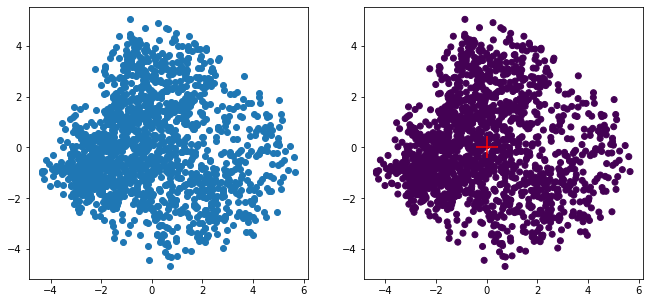

For i  2
Centers


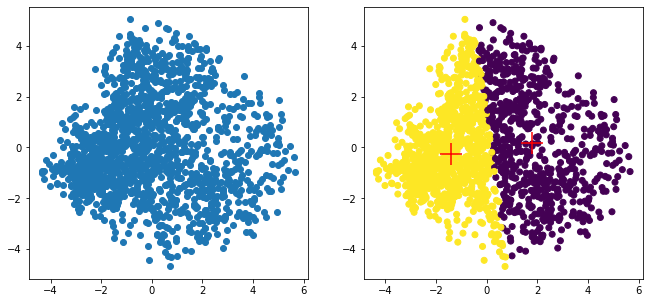

For i  3
Centers


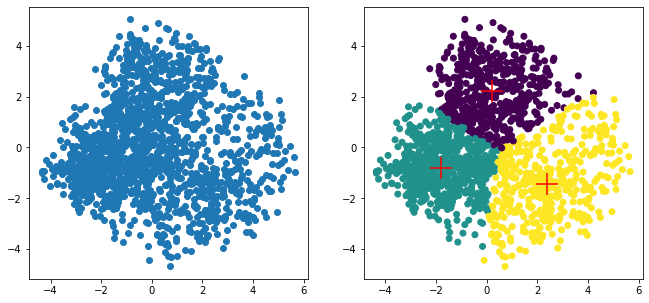

For i  4
Centers


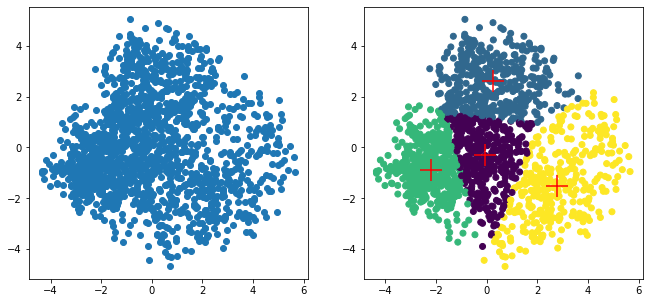

For i  5
Centers


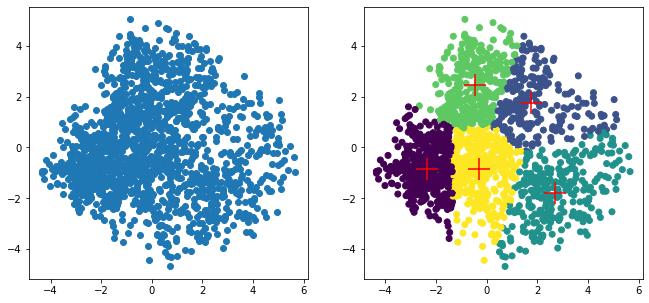

In [171]:
def use_cmeans(itera,data):
    for i in range(itera):
        print("For i ", i+1)
        fcmeans(data,i+1)
use_cmeans(5,reduced_data)  

## Kmeans

In [173]:
best_modelt = Kmeans_c(5, 5, reduced_data)

Inertia for the models
[2815.0937696883725, 2809.3338604982573, 2684.13447560086, 2684.1344756008593, 2682.197169814023, 2682.3396381331886]

Min Inertia
2682.197169814023

Low Inertia model
KMeans(init=array([[0.10973793, 0.51004386],
       [0.2147954 , 0.61458735],
       [0.37886201, 0.97682928],
       [0.41697476, 0.8817102 ],
       [0.78968488, 0.56002128]]),
       n_clusters=5, n_init=1, random_state=0)


In [175]:
# Predictions 
predictc = best_modelt.predict(reduced_data)
np.unique(predictc)

array([0, 1, 2, 3, 4], dtype=int32)

In [177]:
#reduced_datar.explained_variance_rati
pca.explained_variance_ratio_

array([0.07828544, 0.06658118])

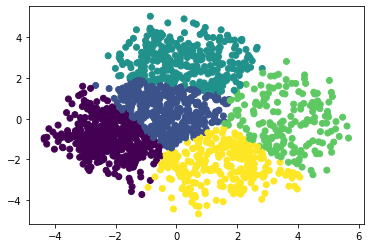

In [179]:
# Plot the predictions
plt.scatter(reduced_data[:,0],reduced_data[:,1], c=predictc)

In [180]:
pca = PCA(n_components=2)
reduced_data = pca.fit_transform(data)
class_labels = use_posbc(5,5,reduced_data)

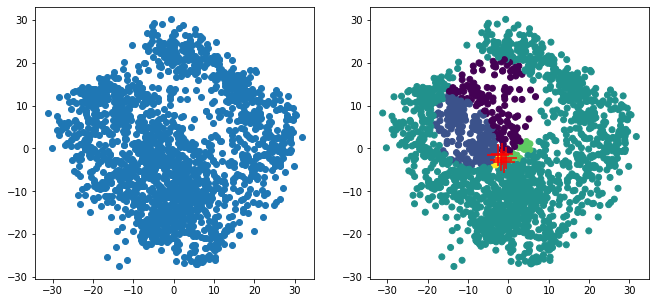

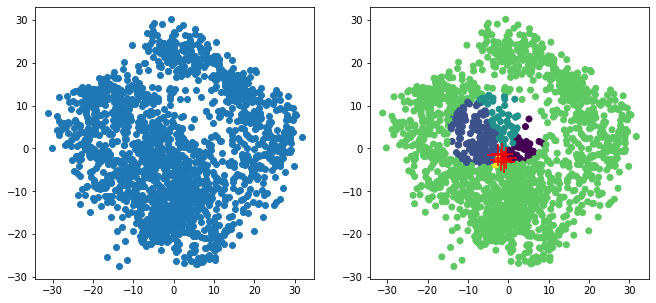

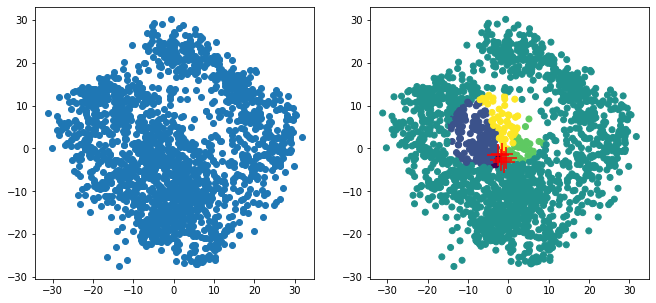

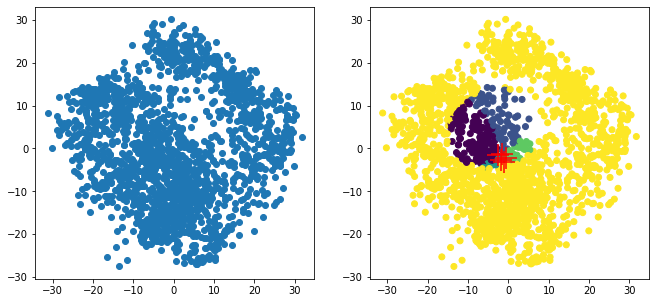

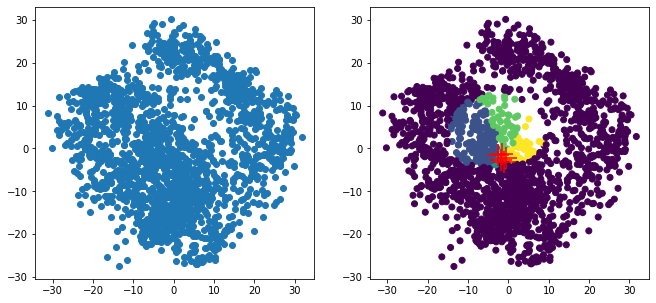

In [181]:
#class_labels for the handritting data
plot_it(reduced_data,class_labels)

In [ ]:
#class_labels for the handritting data
#class_labels for the handritting dat
